In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# QUESTION 4 - Plot the graph between [0, 3]

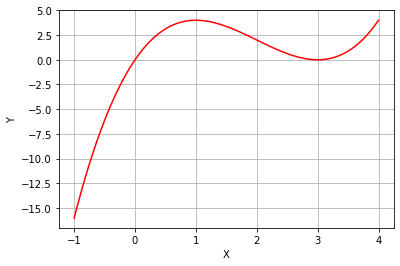

In [3]:
def f(x):
    return x*x*x - 6.0*x*x +9.0*x
        
'''
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
Returns num evenly spaced samples, calculated over the interval [start, stop].
The endpoint of the interval can optionally be excluded
'''
X = np.linspace(-1.0, 4.0, num=100, endpoint=True)
Y = np.zeros(100)

# loop to compute array Y=f(X)
for i in range(len(Y)):
    Y[i] = f(X[i])

# Add code to plot Y=f(X)
fig = plt.figure()
plt.plot(X, Y, "-r", label="f(x)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


In [4]:
# x[i+1] = x[i] - f(x[i]) * ((x[i]-x[i-1]) / (f(x[i])-f(x[i-1])))

def secant(f, x0, x1, tol):
    x = x1
    it = 0
    while abs(f(x)) > tol:
        x = x1 - f(x1) * ((x1-x0) / (f(x1) - f(x0)))
        x0 = x1
        x1 = x
        it+=1
    return x, it


In [5]:
def secant_results(f, x0, x1, tol):
    x = []
    x.append(x0)
    x.append(x1)
    it = 1
    while abs(f(x[it])) > tol:
        x.append(x[it] - f(x[it]) * ((x[it]-x[it-1]) / (f(x[it])-f(x[it-1]))))
        it+=1

    # Create a table headers
    print ("{:<8} {:<20} {:<20} {:<20}".format('it','x0', 'x1', 'abs_error'))

    # Creating the table
    for i in range(it):
        print ("{:<8} {:<20} {:<20} {:<20}".format(i, x[i], x[i+1],  abs(f(x[i+1]))))
  
    return x[it], it-1 # subtracting the additional increment before loop ended

In [6]:
# QUESTION 5 and 6 - implement secant and test your implementation
def f_Q5(x):
    return x*x*x - 6.0*x*x +9.0*x

x_Q5, it_Q5 = secant(f, 4.0, 5.0, 1.e-6)
print(f"The secant method: {x_Q5} after {it_Q5} iterations")
np.testing.assert_allclose(abs(f(x_Q5)), 0.0, atol=1.0e-6)


The secant method: 3.0004913634209194 after 17 iterations


In [7]:
# Testing my implementation with NACA0012 formula
def f_NACA(x):
    t = 0.1

    yp = -0.1015 * x**4 + 0.2843 * x**3 - 0.3516 * x**2 \
          - 0.126 * x + 0.2969 * np.sqrt(x)
    f = yp - 0.5 * t

    return f

x_NACA, it_NACA = secant_results(f_NACA, 1.0, 0.9, 1.0e-4)
print(f"The secant method: {x_NACA} after {it_NACA} iterations")


it       x0                   x1                   abs_error           
0        1.0                  0.9                  0.02587137880880254 
1        0.9                  0.7825556144242902   0.0030947845637205457
2        0.7825556144242902   0.7665977821134375   0.00023878545736084889
3        0.7665977821134375   0.7652635736123391   2.557468243971628e-06
The secant method: 0.7652635736123391 after 3 iterations
